<a href="https://colab.research.google.com/github/Nripendrobiswas/Air_Quality_Index__Prediction_Project/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('/content/Missing value filled.csv')

In [ ]:
df.head()

,Date,MaxTemperature,MeanTemperature,MinTemperature,RHumidity,Rainfall,WindSpeed,AQI,Category,Lagged_col,Rolling_mean
0,2014-02-17,19.0,16.4,16.0,97.0,15.0,3.0,129.0,CAUTION,NaN,NaN
1,2014-02-18,24.3,17.2,13.5,80.0,4.0,5.0,159.0,UNHEALTHY,NaN,NaN
2,2014-02-19,28.9,19.3,12.0,66.0,0.0,2.8,196.0,UNHEALTHY,NaN,NaN
3,2014-02-20,29.6,20.4,12.2,68.0,0.0,2.0,181.0,UNHEALTHY,129.0,NaN
4,2014-02-21,29.2,20.7,13.0,67.0,0.0,2.5,184.0,UNHEALTHY,159.0,NaN


In [ ]:
df.shape

(2666, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2666 non-null   object 
 1   MaxTemperature   2666 non-null   float64
 2   MeanTemperature  2666 non-null   float64
 3   MinTemperature   2666 non-null   float64
 4   RHumidity        2666 non-null   float64
 5   Rainfall         2666 non-null   float64
 6   WindSpeed        2666 non-null   float64
 7   AQI              2666 non-null   float64
 8   Category         2568 non-null   object 
 9   Lagged_col       2663 non-null   float64
 10  Rolling_mean     2652 non-null   float64
dtypes: float64(9), object(2)
memory usage: 229.2+ KB


In [ ]:
df.isnull().sum()

Date                0
MaxTemperature      0
MeanTemperature     0
MinTemperature      0
RHumidity           0
Rainfall            0
WindSpeed           0
AQI                 0
Category           98
Lagged_col          3
Rolling_mean       14
dtype: int64

In [ ]:
df= df.drop(['Category','Lagged_col','Rolling_mean'], axis=1)

In [ ]:
df.head()

,Date,MaxTemperature,MeanTemperature,MinTemperature,RHumidity,Rainfall,WindSpeed,AQI
0,2014-02-17,19.0,16.4,16.0,97.0,15.0,3.0,129.0
1,2014-02-18,24.3,17.2,13.5,80.0,4.0,5.0,159.0
2,2014-02-19,28.9,19.3,12.0,66.0,0.0,2.8,196.0
3,2014-02-20,29.6,20.4,12.2,68.0,0.0,2.0,181.0
4,2014-02-21,29.2,20.7,13.0,67.0,0.0,2.5,184.0


In [ ]:
df = df.dropna()

<ipython-input-155-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

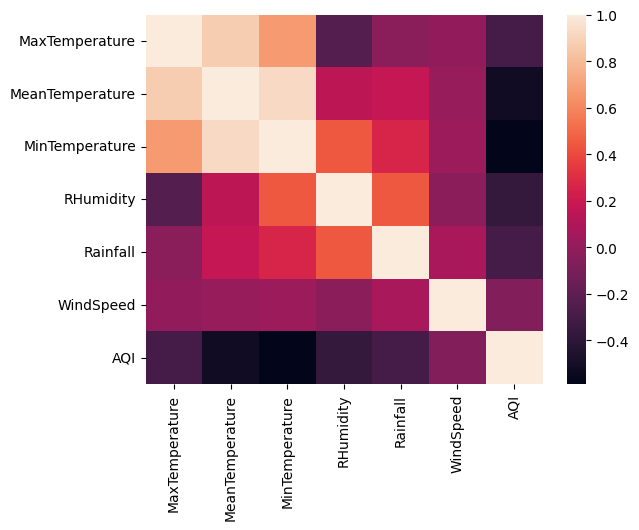

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.describe()

,MaxTemperature,MeanTemperature,MinTemperature,RHumidity,Rainfall,WindSpeed,AQI
count,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,30.982896,25.176444,21.173593,78.265191,11.406977,3.274381,88.692048
std,3.408040,3.767788,4.484641,10.270187,23.381841,1.627971,71.247254
min,18.000000,15.300000,8.800000,36.000000,0.000000,0.000000,0.000000
25%,28.600000,22.100000,17.500000,72.000000,0.000000,2.000000,28.000000
50%,31.500000,26.100000,22.000000,79.000000,0.000000,3.000000,62.000000
75%,33.700000,28.200000,25.200000,86.000000,12.000000,4.000000,139.000000
max,39.200000,33.400000,29.400000,98.000000,204.000000,18.000000,446.000000


In [ ]:
#DF.AQI_Bucket= DF.AQI_Bucket.astype(float)
#DF[['AQI_Bucket']] = DF[['AQI_Bucket']].apply(pd.to_numeric)

<Axes: >

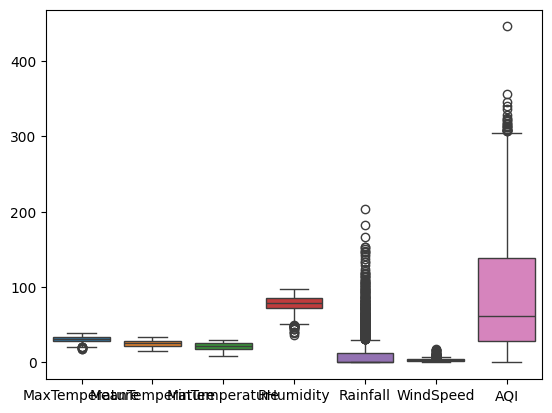

In [ ]:
sns.boxplot(data=df)

In [ ]:
drop_outlier = df[(df['AQI']>200) | (df['MaxTemperature']>50) | (df['MeanTemperature']>50)].index

In [ ]:
df = df.drop(drop_outlier)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 0 to 2665
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             2457 non-null   object 
 1   MaxTemperature   2457 non-null   float64
 2   MeanTemperature  2457 non-null   float64
 3   MinTemperature   2457 non-null   float64
 4   RHumidity        2457 non-null   float64
 5   Rainfall         2457 non-null   float64
 6   WindSpeed        2457 non-null   float64
 7   AQI              2457 non-null   float64
dtypes: float64(7), object(1)
memory usage: 172.8+ KB


<Axes: >

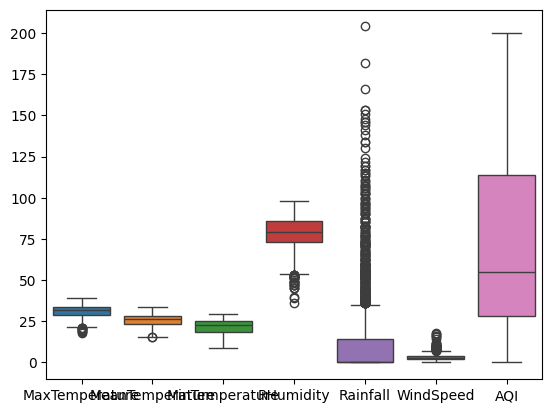

In [ ]:
sns.boxplot(data= df)

<Axes: xlabel='AQI', ylabel='MaxTemperature'>

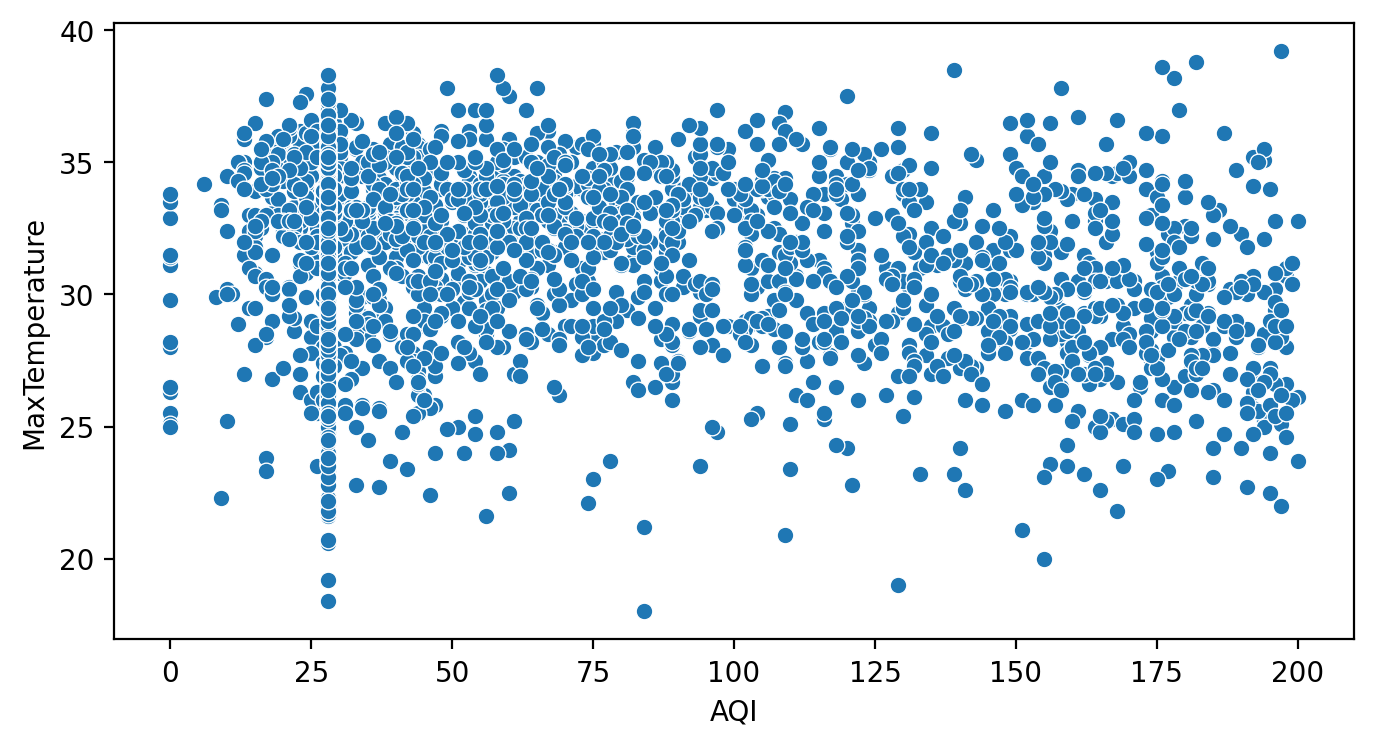

In [ ]:
plt.figure(figsize=(8,4),dpi=200)
palette ={'Good': "g", 'Poor': "C0", 'Very Poor': "C1",'Severe': "r","Moderate": 'b',"Satisfactory":'y'}
sns.scatterplot(x= 'AQI', y= 'MaxTemperature', data=df)

In [ ]:
X= df.drop(['AQI','Date'], axis= 1)
y= df['AQI']

<Axes: >

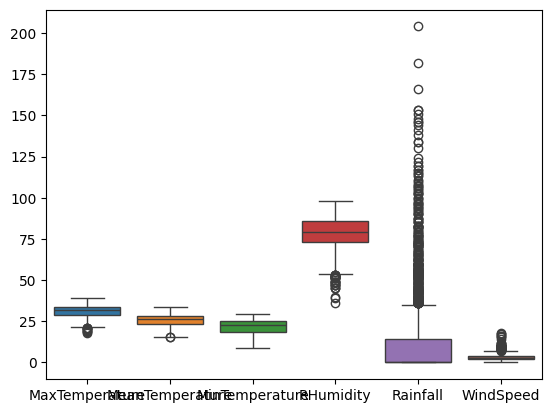

In [ ]:
sns.boxplot(data=X)

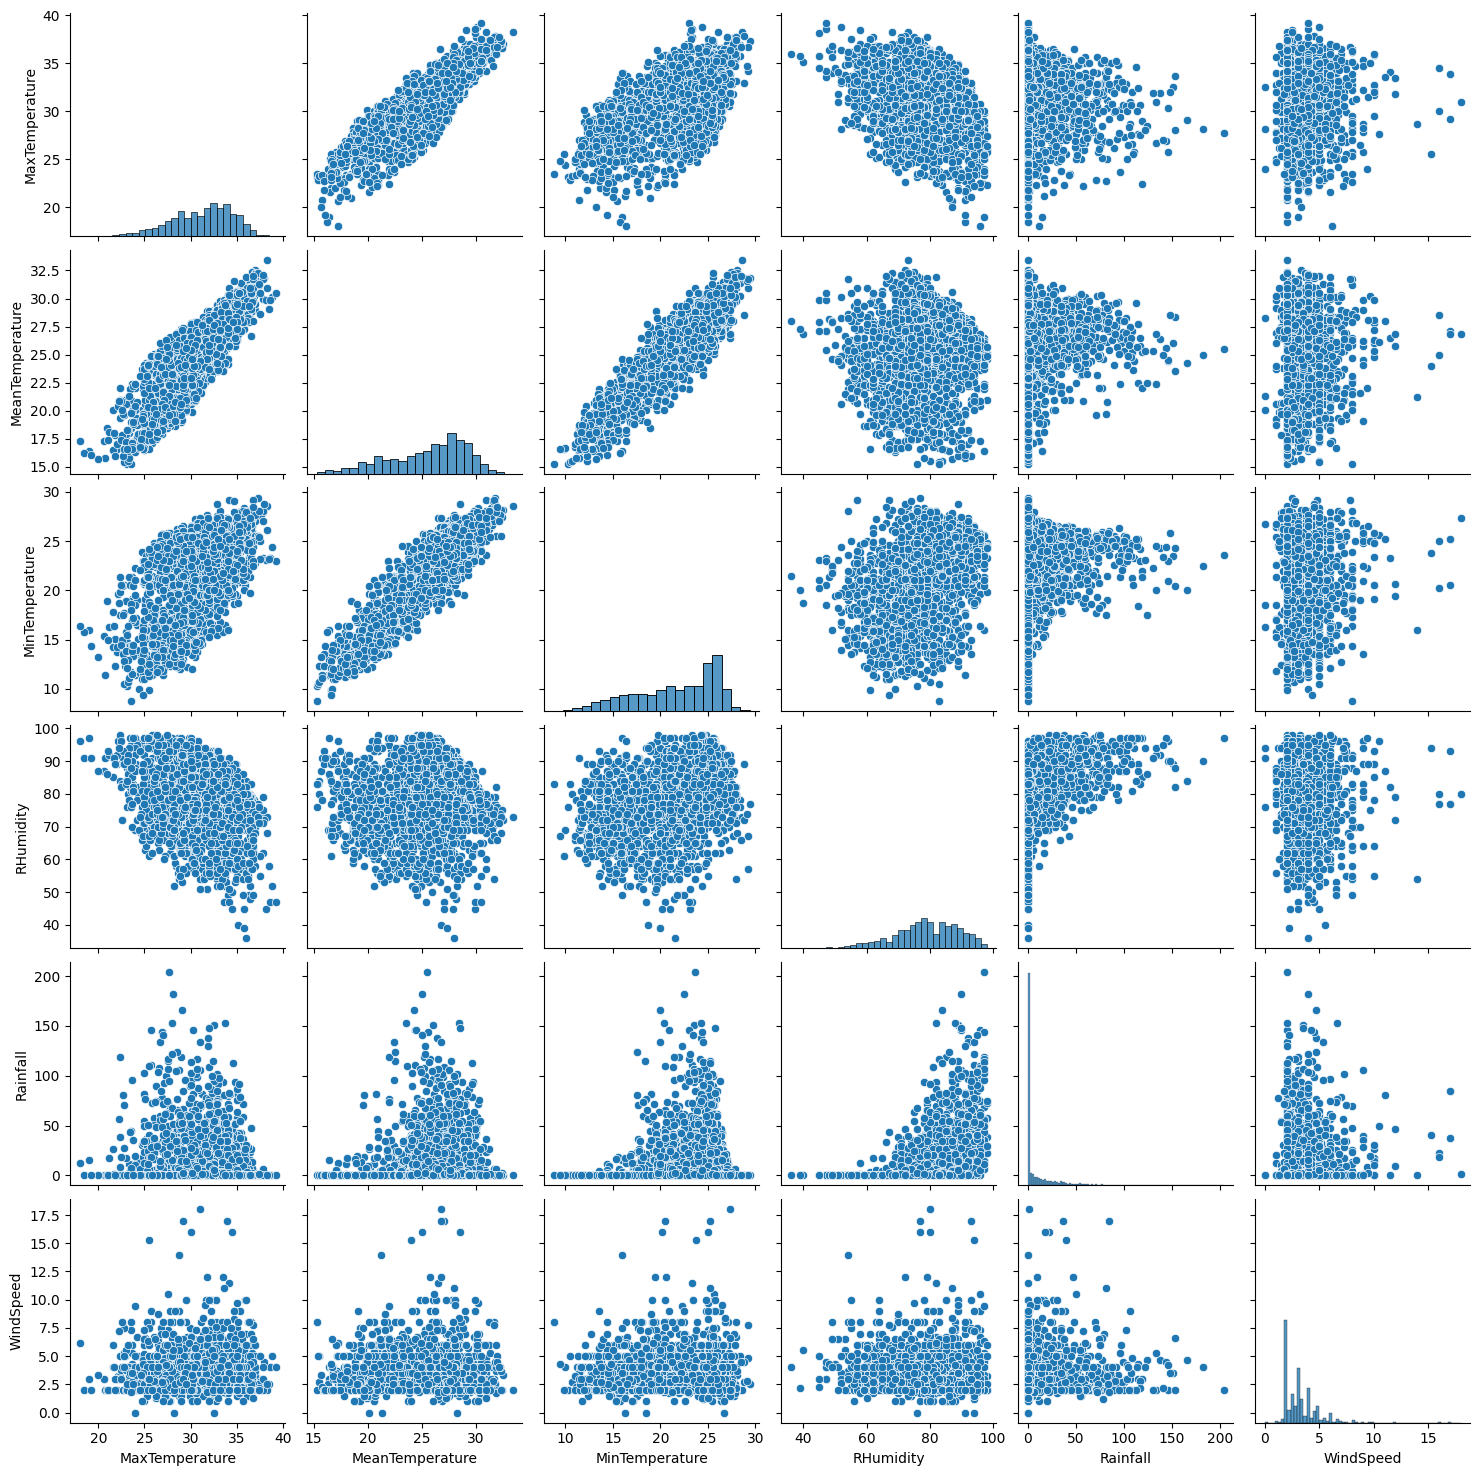

In [ ]:
sns.pairplot(data=X)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2457 entries, 0 to 2665
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MaxTemperature   2457 non-null   float64
 1   MeanTemperature  2457 non-null   float64
 2   MinTemperature   2457 non-null   float64
 3   RHumidity        2457 non-null   float64
 4   Rainfall         2457 non-null   float64
 5   WindSpeed        2457 non-null   float64
dtypes: float64(6)
memory usage: 134.4 KB


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
from sklearn.preprocessing import StandardScaler
Scaler = StandardScaler()

scaled_X_train = Scaler.fit_transform(X_train)
scaled_X_test = Scaler.transform(X_test)

In [ ]:
from sklearn.svm import SVR

In [ ]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],
             'kernel':['linear','rbf','poly'],
              'gamma':['scale','auto'],
              'degree':[2,3,4],
              'epsilon':[0,0.01,0.1,0.5,1,2]}

In [ ]:
from sklearn.model_selection import GridSearchCV

svr = SVR()
grid = GridSearchCV(svr,param_grid=param_grid)

In [ ]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1], 'degree': [2, 3, 4],
                         'epsilon': [0, 0.01, 0.1, 0.5, 1, 2],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']})

In [ ]:
grid.best_params_

{'C': 1, 'degree': 2, 'epsilon': 2, 'gamma': 'scale', 'kernel': 'rbf'}

In [ ]:
model_predict=grid.predict(scaled_X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
mean_squared_error(model_predict, y_test)


2110.0403686520185

In [ ]:
np.sqrt(mean_squared_error(y_test,model_predict))

45.93517572244628

In [ ]:
x=np.arange(0,len(y_test))
print(x)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

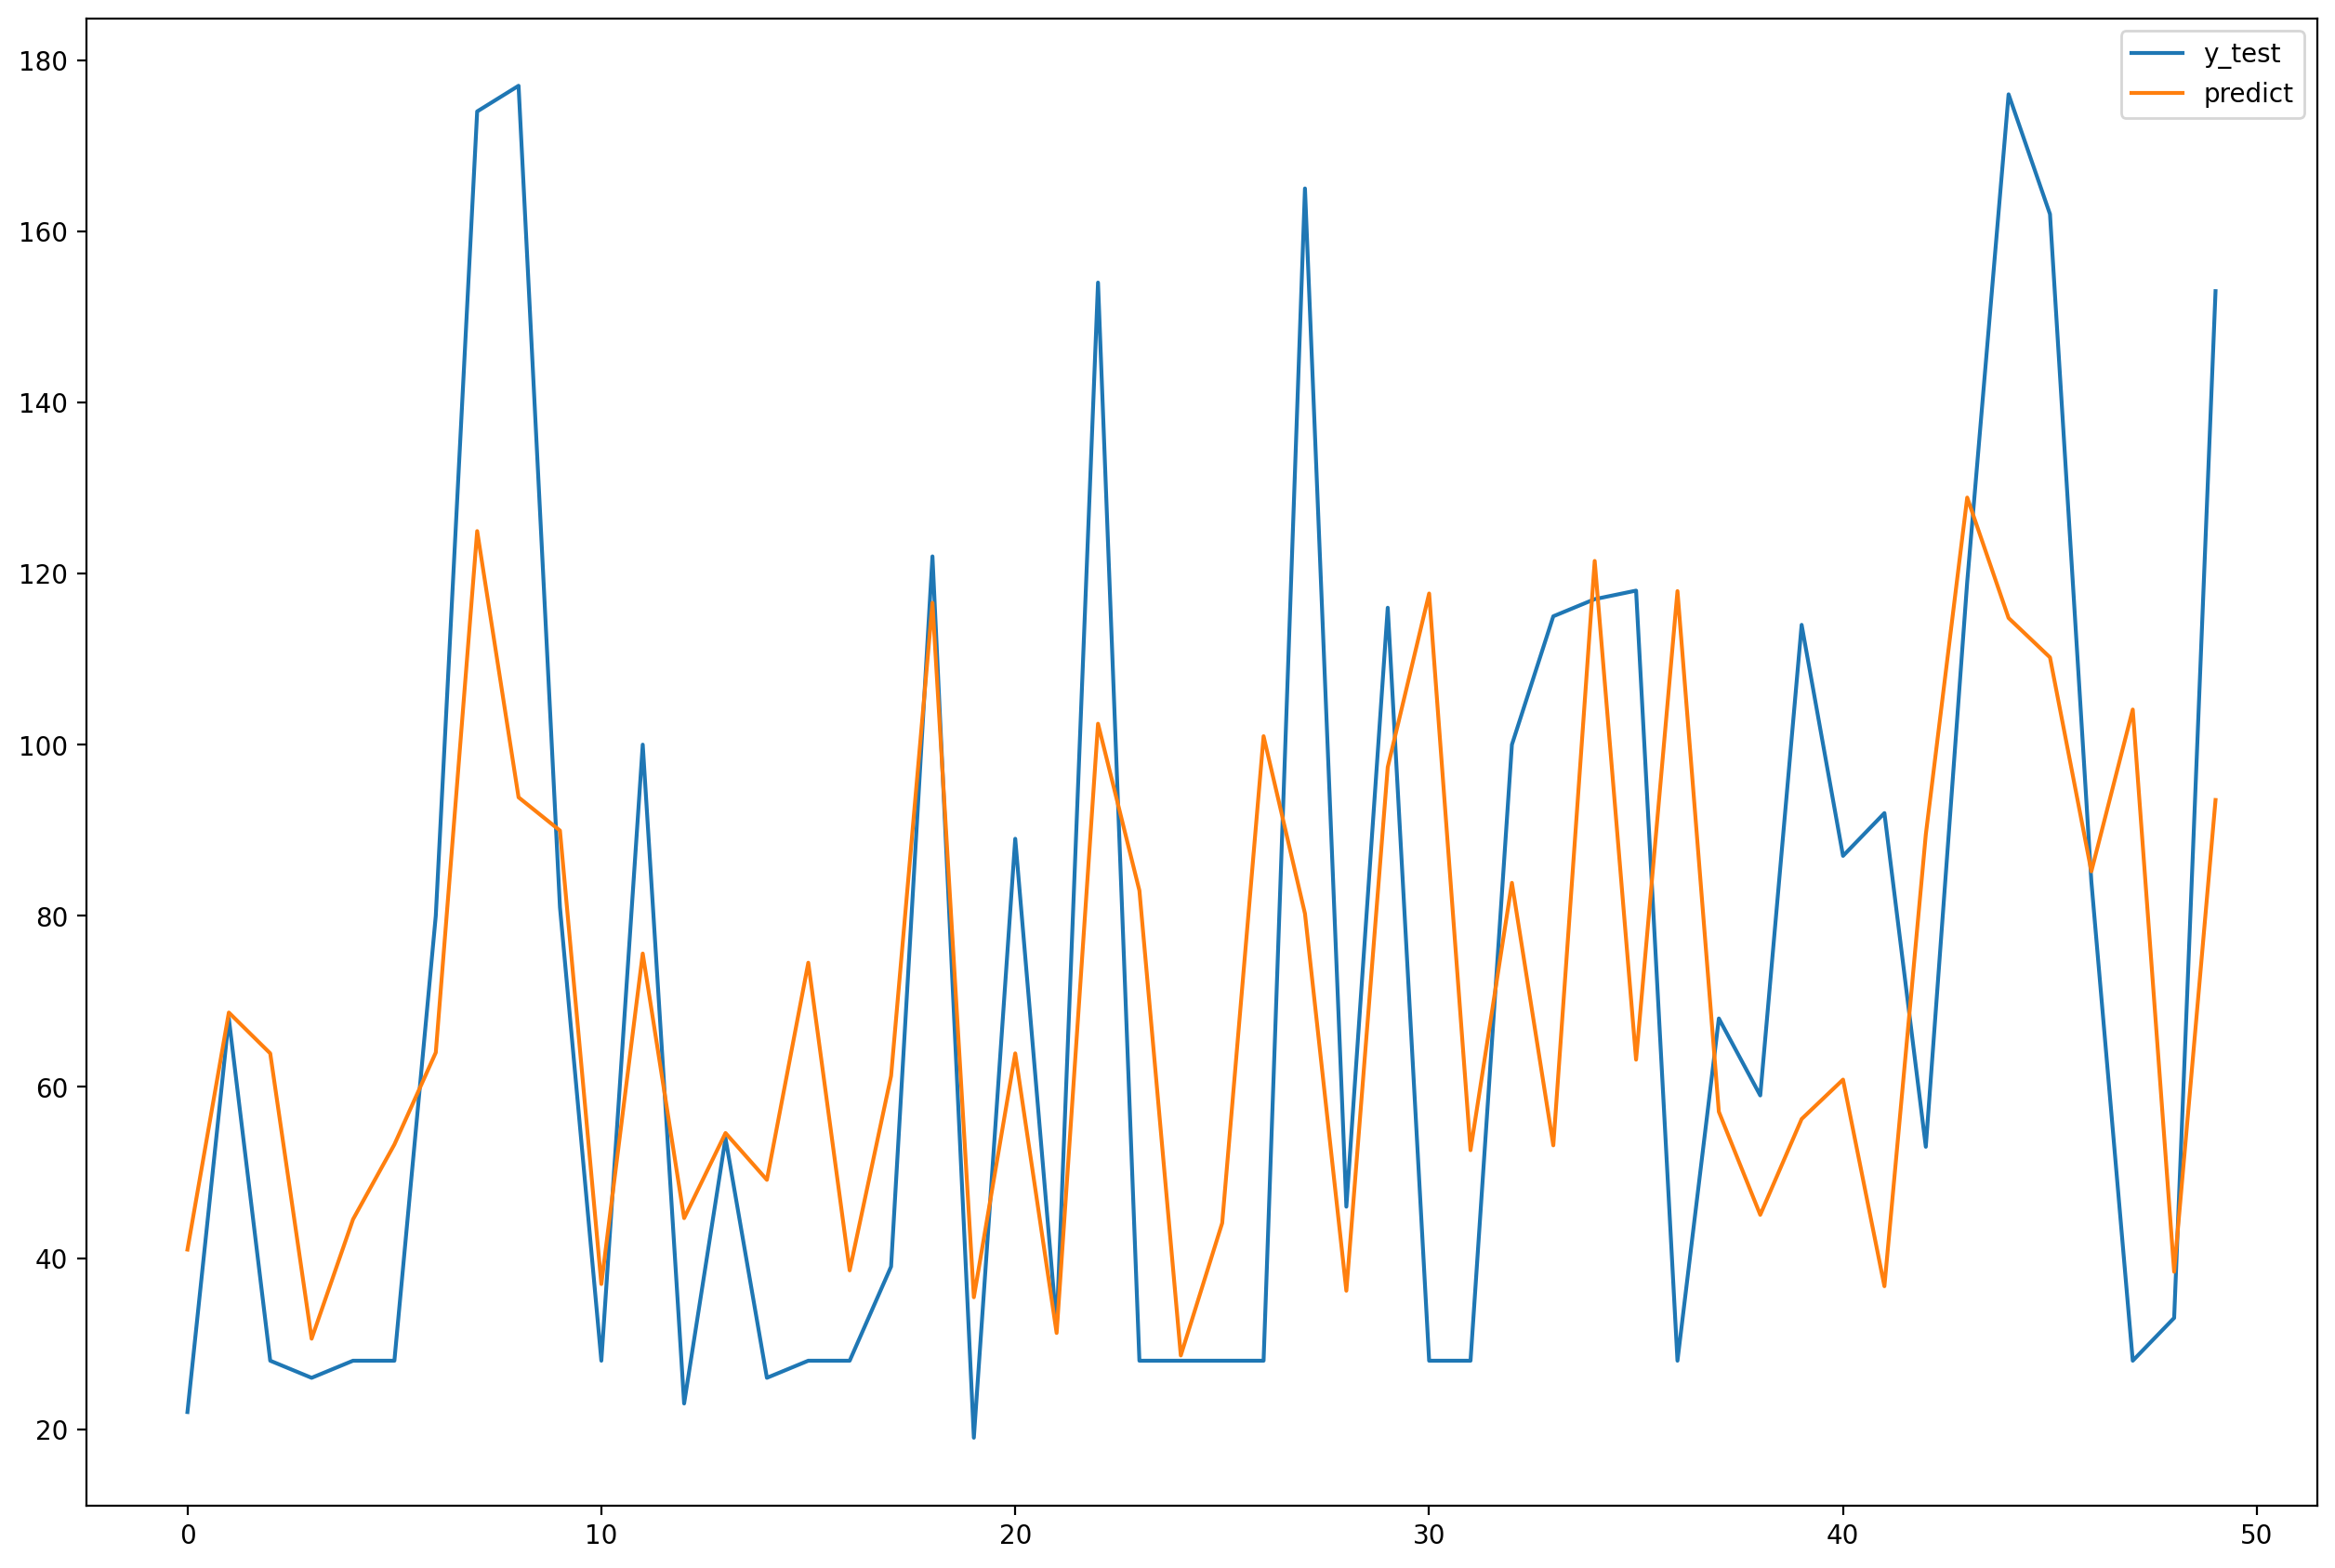

In [ ]:
fig = plt.figure(figsize =(12,8), dpi=200)

# Add set of axes to figure
axes = fig.add_axes([0, 0, 1, 1]) # left, bottom, width, height (range 0 to 1)

# Plot on that set of axes
axes.plot(x[0:50], y_test[0:50], label='y_test')
axes.plot(x[0:50], model_predict[0:50], label='predict')
plt.legend()
plt.show()